In [27]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

In [28]:
# Definicje funkcji do interpolacji
def f1(x):
    return np.sin(x)

def f2(x):
    return np.sin(x - 1)

def f3(x):
    return np.sign(np.sin(8 * x))

In [29]:
# Wybór obszaru definiowania funkcji
x_range = np.linspace(-np.pi, np.pi, 100)

In [30]:
# Liczba punktów
N = 100
x_points = np.linspace(-np.pi, np.pi, N)
y_points = f1(x_points)  # Możesz zmieniać funkcje f1, f2, f3

In [31]:
# Definicje jąder konwolucji
def h1(x):
    return np.where((x >= 0) & (x < 1), 1, 0)

def h2(x):
    return np.where((x >= -0.5) & (x < 0.5), 1, 0)

def h3(x):
    return np.where(np.abs(x) <= 1, 1 - np.abs(x), 0)

def h4(x):
    return np.sin(x) / x  # Możesz dodać ograniczenie dziedziny, jeśli chcesz

In [32]:
# Interpolacja za pomocą konwolucji
convolution_result = scipy.signal.convolve(y_points, h1(x_range), mode='same')

In [33]:
# Obliczanie MSE
mse = np.mean((f1(x_range) - convolution_result)**2)

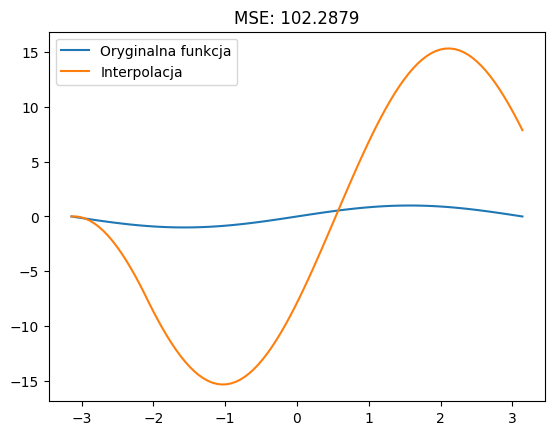

In [34]:
# Wykresy
plt.figure()
plt.plot(x_range, f1(x_range), label="Oryginalna funkcja")
plt.plot(x_range, convolution_result, label="Interpolacja")
plt.title(f'MSE: {mse:.4f}')
plt.legend()
plt.show()

git:


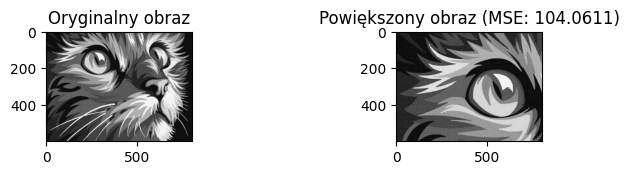

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Wczytaj obraz w skali szarości (zmień ścieżkę do pliku)
image = cv2.imread('obraz.jpg', cv2.IMREAD_GRAYSCALE)

# Nowe rozmiary obrazu po skalowaniu
new_width = image.shape[1] * 2  # Podwajamy szerokość
new_height = image.shape[0] * 2  # Podwajamy wysokość

# Inicjalizacja obrazu wynikowego o nowych rozmiarach
larger_image = np.zeros((new_height, new_width), dtype=np.uint8)

# Obliczanie współczynników skalowania
x_scale = new_width / image.shape[1]
y_scale = new_height / image.shape[0]

# Iteracja po pikselach obrazu wynikowego
for y in range(new_height):
    for x in range(new_width):
        # Współrzędne piksela w oryginalnym obrazie
        original_x = x / x_scale
        original_y = y / y_scale

        # Interpolacja biliniowa
        x1 = int(original_x)
        y1 = int(original_y)
        x2 = x1 + 1
        y2 = y1 + 1

        if x2 < image.shape[1] and y2 < image.shape[0]:
            # Oblicz wagi dla czterech sąsiednich pikseli w oryginalnym obrazie
            weight_x2 = original_x - x1
            weight_x1 = 1 - weight_x2
            weight_y2 = original_y - y1
            weight_y1 = 1 - weight_y2

            # Interpolacja biliniowa
            larger_image[y, x] = (
                weight_x1 * weight_y1 * image[y1, x1] +
                weight_x2 * weight_y1 * image[y1, x2] +
                weight_x1 * weight_y2 * image[y2, x1] +
                weight_x2 * weight_y2 * image[y2, x2]
            )

# Upewnij się, że obraz powiększony ma takie same rozmiary jak oryginalny
larger_image = larger_image[:image.shape[0], :image.shape[1]]

# Obliczanie MSE pomiędzy oryginalnym obrazem a powiększonym obrazem
mse_larger = np.mean((image - larger_image) ** 2)

# Wyświetlenie obrazów i wyników
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Oryginalny obraz')
#plt.subplot(132), plt.imshow(smaller_image, cmap='gray'), plt.title(f'Zmniejszony obraz (MSE: {mse_smaller:.4f})')
plt.subplot(133), plt.imshow(larger_image, cmap='gray'), plt.title(f'Powiększony obraz (MSE: {mse_larger:.4f})')
plt.show()
